In [1]:
import math
import pandas as pd
import numpy as np

import statsmodels.api as sm

from matplotlib.pylab import plt
import seaborn as sns

from os.path import exists, isfile

In [2]:
if not exists("../../datasets/2400_combine_developer_datasets.csv"):
    print ("Missing dataset file")
    
df=pd.read_csv("../../datasets/2400_combine_developer_datasets.csv")
df.head()

,apple_rating,google_rating,normed_apple_rating,normed_google_rating,apple_revenue,google_revenue,z_score_apple_rating,z_score_google_rating,app_num,log_google_reviews,log_apple_reviews,google_reviews,apple_reviews
0,4.0,4.4,0.8,0.88,0.00,0.00,-0.083987,0.449144,1,6.065666,3.322012,1163232.0,2099.0
1,4.0,4.5,0.8,0.90,0.00,0.00,-0.083987,0.646570,1,4.906755,2.754348,80678.0,568.0
2,4.0,4.2,0.8,0.84,28521.45,137382.48,-0.083987,0.054292,1,4.138366,3.455606,13752.0,2855.0
3,3.5,4.2,0.7,0.84,0.00,0.00,-0.806018,0.054292,1,4.878206,4.222274,75545.0,16683.0
4,4.5,4.6,0.9,0.92,0.00,0.00,0.638043,0.843996,1,5.823814,3.994713,666521.0,9879.0


In [3]:
df['google_reviews'].describe()

count    4.440000e+02
mean     1.514360e+06
std      5.807573e+06
min      2.400000e+01
25%      3.487450e+04
50%      1.676325e+05
75%      9.859610e+05
max      7.815831e+07
Name: google_reviews, dtype: float64

In [4]:
df['apple_reviews'].describe()

count    4.440000e+02
mean     7.325633e+04
std      2.066317e+05
min      7.000000e+00
25%      2.339250e+03
50%      1.281500e+04
75%      5.753400e+04
max      2.974676e+06
Name: apple_reviews, dtype: float64

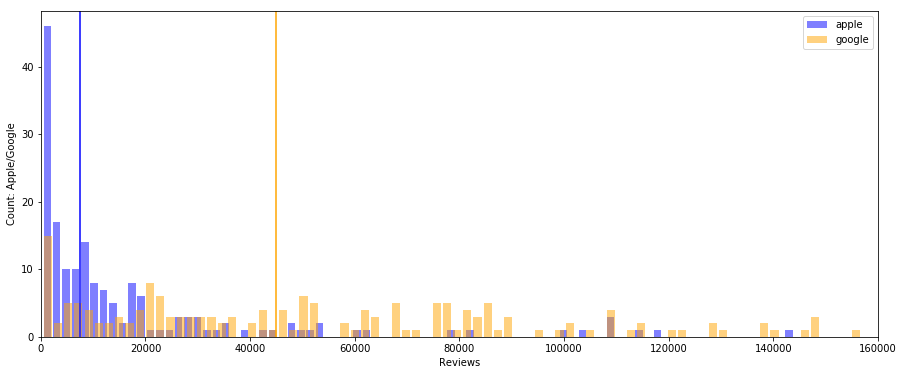

In [5]:
fig, ax = plt.subplots(figsize=(15, 6))

min_val = 300
max_val = 1.6e5
df_reviews = df[(df['apple_reviews']>min_val) & (df['apple_reviews']<max_val)]
df_reviews = df_reviews[(df_reviews['google_reviews']>min_val) & (df_reviews['google_reviews']<max_val)]

df_reviews['apple_reviews'].hist(ax=ax, rwidth=.8, alpha=.5, bins=80, label='apple', color='blue')
df_reviews['google_reviews'].hist(ax=ax, rwidth=.8, alpha=.5, bins=80, label='google', color='orange')

apple_median = df_reviews['apple_reviews'].median()
google_median = df_reviews['google_reviews'].median()
ax.set_xlim(-10, max_val)
#ax.set_ylim(1, 8)

ax.axvline(apple_median, c='blue')
ax.axvline(google_median, c='orange')

ax.grid(False)
ax.set_xlabel('Reviews')
ax.set_ylabel('Count: Apple/Google')
ax.legend()

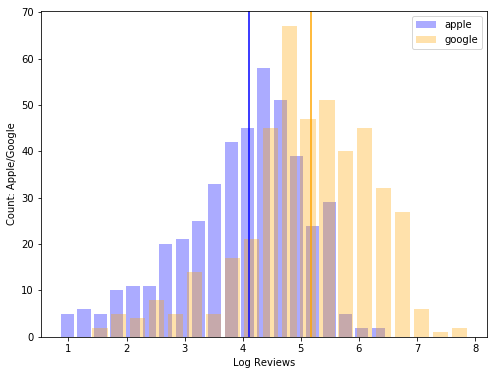

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

df['log_apple_reviews'].hist(ax=ax, rwidth=.8, alpha=.33, bins=20, label='apple', color='blue')
df['log_google_reviews'].hist(ax=ax, rwidth=.8, alpha=.33, bins=20, label='google', color='orange')

apple_median = df['log_apple_reviews'].median()
google_median = df['log_google_reviews'].median()

ax.axvline(apple_median, c='blue')
ax.axvline(google_median, c='orange')

ax.grid(False)
ax.set_xlabel('Log Reviews')
ax.set_ylabel('Count: Apple/Google')
ax.legend()

/home/eloise/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0, 0.5, 'Log Apple Reviews')

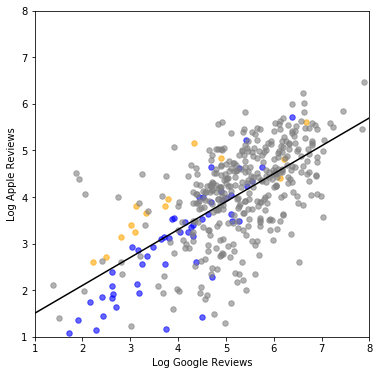

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.regplot('log_google_reviews', 'log_apple_reviews', data=df[df['google_revenue'] > df['apple_revenue']], ax=ax,
            truncate=True, fit_reg=False,
            scatter_kws=dict(alpha=.6, color='blue', s=30))
sns.regplot('log_google_reviews', 'log_apple_reviews', data=df[df['google_revenue'] < df['apple_revenue']], ax=ax,
            truncate=True, fit_reg=False,
            scatter_kws=dict(alpha=.6, color='orange', s=30))
sns.regplot('log_google_reviews', 'log_apple_reviews', data=df[df['google_revenue'] == df['apple_revenue']], ax=ax,
            truncate=True, fit_reg=False,
            scatter_kws=dict(alpha=.6, color='grey', s=30))

ax.set_xlim(1, 8)
ax.set_ylim(1, 8)

x = sm.add_constant(df['log_google_reviews'])
y = df['log_apple_reviews']
regr = sm.OLS(y, x)
res = regr.fit()
plt.plot([1,8],[res.params[0]+res.params[1],res.params[0]+res.params[1]*8], c='black')

ax.set_xlabel('Log Google Reviews')
ax.set_ylabel('Log Apple Reviews')